In [43]:
## imports
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import numpy as np

In [44]:
## math utils functions

# lhs < rhs
def lt(lhs, rhs):
    # inf < ?
    if lhs == POS_INFINITY:
        return False

    # ? < -inf
    if rhs == NEG_INFINITY:
        return False

    # -inf < ?
    if lhs == NEG_INFINITY:
        # -inf < (> -int)
        return True

    # ? < inf
    if rhs == POS_INFINITY:
        # (< inf) < inf
        return True

    # there is no case where
    # - lhs = POS_INFINITY
    # - lhs = NEG_INFINITY
    # - rhs = POS_INFINITY
    # - rhs = NEG_INFINITY
    # so just use the float check
    return lhs < rhs

# lhs > rhs
def gt(lhs, rhs):
    # ? > inf
    if rhs == POS_INFINITY:
        return False

    # -inf > ?
    if lhs == NEG_INFINITY:
        return False

    # ? > -inf
    if rhs == NEG_INFINITY:
        # (> -int) > -inf
        return True

    # inf > ?
    if lhs == POS_INFINITY:
        # inf > (< inf)
        return True

    # there is no case where
    # - lhs = POS_INFINITY
    # - lhs = NEG_INFINITY
    # - rhs = POS_INFINITY
    # - rhs = NEG_INFINITY
    # so just use the float check
    return lhs > rhs

# lhs >= rhs
def gte(lhs, rhs):
    return not lt(lhs, rhs)

# lhs <= rhs
def lte(lhs, rhs):
    return not gt(lhs, rhs)


In [36]:
def intersect_two_intervals(a,b):
    """Given 2 intervals a = [a0,a1] and b=[b0,b1], check whether they intersect.  If they do, return their intersection."""
    if a[0] <= b[0]:
        minArray = a
        maxArray = b
    else:
        minArray = b
        maxArray = a
    if minArray[1] > maxArray[0]: ## has nonempty intersection. return intersection
        return [maxArray[0], minArray[1]]
    else: ## no intersection.
        return []

    
def intersect_two_boxes(a,b):
    result = []
    d = len(a) ## dimension
    for i in range(d):
        subresult = intersect_two_1d_boxes(a[i],b[i])
        if subresult == []:
            return None
        else:
            result.append(subresult)
    return result

def intersect_two_param_spaces(ps1, ps2):
    results_list = []
    for box1 in ps1:
        for box2 in ps2:
            subresult = intersect_two_boxes(box1, box2)
            if subresult != None:
                results_list.append(subresult)
    return results_list

In [3]:
## short example of marginalization. this uses intervals but needs to be changed to boxes.

## basic 2d box plotting function

def plot2DBox(box, color="b",alpha=0.2):
    x_limits = [box[0][0],box[0][1]]
    y_limits = [box[1][0],box[1][1]]
    x = np.linspace(x_limits[0], x_limits[1], 1000)
    plt.fill_between(x, y_limits[0], y_limits[1], color=color, alpha=alpha)


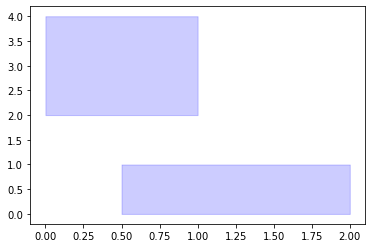

In [9]:
box_1 = [[0.5,2], [0,1]]
box_2 = [[0,1], [2,4]]
box_3 = [[3,4], [2,4]]
plot2DBox(box_1)
plot2DBox(box_2)
##plot2DBox(box_3)

In [31]:
def union_two_boxes(b1,b2):
    ## check for intersecting x-bounds
    ## if there is an intersection:
    x_intersection = (intersect_two_intervals(b1[0], b2[0]))
    if x_intersection != []:
        total_width = x_intersection[1] - x_intersection[0]
    y_intersection = (intersect_two_intervals(b1[1], b2[1]))
    if y_intersection == []:
        ## get the height of the disjoint region
        height_b1 = b1[1][1] - b1[1][0]
        height_b2 = b2[1][1] - b2[1][0]
        total_height = (height_b1 + height_b2)
    return total_width, total_height
    
    

In [32]:
union_two_boxes(box_1, box_2)

[]


(0.5, 3)

In [40]:
### 3d examples

box13d = [[0,1],[0,1],[0,1]]
box23d = [[2,3],[2,3],[2,3]]
intersect_two_boxes(box23d,box13d)